In [2]:
import random

In [3]:
def roll_dice():
    
    dice_sides = [1, 2, 3, 4, 5, 6, 7, 8]
    roll = random.choices(dice_sides, weights = [1, 2, 3, 4, 5, 6, 7, 8], k = 1)
    roll_result = roll
    return roll_result

In [4]:
roll_dice()

[5]

In [5]:
tenthousand_rolls = [roll_dice() for roll in range(1,10001)]
print(len(tenthousand_rolls))
print(tenthousand_rolls[0:10])

10000
[[8], [4], [8], [4], [2], [4], [5], [8], [7], [7]]


In [12]:
#pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 7.6/7.6 MB 18.8 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 KB ? eta 0:00:00
     ---------------------------------------- 55.4/55.4 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 20.2 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 KB 9.4 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 19.8 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\sarah\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import matplotlib.pyplot as plt

In [14]:
tenthousand_flat = [i for sublist in tenthousand_rolls for i in sublist]
print(tenthousand_flat[0:10])

[8, 4, 8, 4, 2, 4, 5, 8, 7, 7]


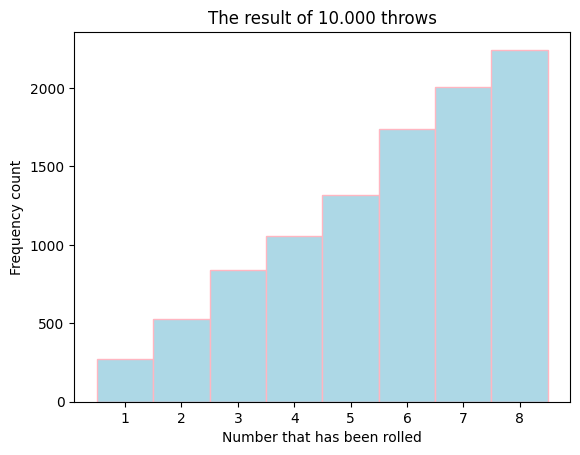

In [15]:
plt.hist(tenthousand_flat, bins = range(1, 10, 1), align = 'left', fc = 'lightblue', ec = 'lightpink')
plt.title('The result of 10.000 throws')
plt.xlabel('Number that has been rolled')
plt.ylabel('Frequency count')

plt.show() 

In [18]:
import time

In [19]:
def roll_dice2():
    roll_result = []
    starting_point = time.time()

    while True:
        dice_sides = [1, 2, 3, 4, 5, 6, 7, 8]
        roll = random.choices(dice_sides, weights = [1, 2, 3, 4, 5, 6, 7, 8], k = 1)
        if roll not in roll_result:
            roll_result.append(roll)
        if len(roll_result) == 8:
            #yield roll_result
            elapsed = time.time() - starting_point
            return elapsed

In [20]:
roll_dice2()

0.0

In [258]:
class Elevator():
    def __init__(self, n_floors):
        self.n_floors = n_floors
        #pickup-locations\n",
        self.pickup_calls = []
        #all people\n",
        self.people = []
        #people on elevator\n",
        self.passengers = []
        #people who reached their destination\n",
        self.happy_people = 0
        #current location\n",
        self.current_floor = 0
        #travel time,
        self.travel_time = 0
        #stopping/traveling time 
        self.action_time = 0
        #floors visited
        self.floors_visited = []
        #direction of travel\n",
        self.direction = 'up'
        #updates on buttons\n",
        self.last_check = 0
    
    def move(self, direction):
        self.action_time += 5
        if direction == 'up':
            self.current_floor += 1
            
            print(""" 
            Elevator is moving up...
            || ↑↑↑↑↑ ||
            || _____ ||
            || |   | ||
            || |   | ||
            || ----- ||
            """)
        else:
            self.current_floor -= 1
            print(""" 
            Elevator is moving down...
            || _____ ||
            || |   | ||
            || |   | ||
            || ----- ||
            || ↓↓↓↓↓ ||
            """)
    
    def change_direction(self):
        if self.direction == 'up':
            self.direction = 'down'
        else:
            self.direction = 'up'
    
    def set_people_list(self, people):
        self.people = people
    
    def set_passenger_list(self):
        self.passengers = [None for i in range(len(self.people))]
    
    def set_pickup_calls(self):
        self.pickup_calls = pickup_calls
    
    def set_destinations(self):
        self.destinations = destinations
    
    def set_travel_time(self, travel_time):
        self.travel_time = travel_time
    
    def update_time(self):
        return self.action_time
    
    def update_floors_visited(self):
        return self.floors_visited
    
    def update_last_check(self):
        self.last_check = self.travel_time
    
    def new_passenger(self, new_passengers):
    
#for coordination of adding and exiting passengers in our elevator:
#first: creating a waiting list for our elevator
    
        passengers_waiting = [i.identity for i in new_passengers]
        all_people = [i.identity for i in new_passengers]

        n_passengers = 0
        passengers = []
    
# adding passengers, while there are still passengers who want to get on
    
        while len(new_passengers) > n_passengers:
            n_passengers += 1  
            id_passenger = min(passengers_waiting) #the first person gets the smallest id
    
            id_of_passenger_in_waiting = passengers_waiting.index(id_passenger)
            id_of_passenger_in_all = all_people.index(id_passenger)
    
            self.passengers[id_passenger] = new_passengers[id_of_passenger_in_all]
            passengers.append(id_passenger)


            del passengers_waiting[id_of_passenger_in_waiting]
    
#if we have the person on bord of our elevator, we delete them from the pickup-list
    
            who_to_delete_from_pickup_calls = []
    
            for person in self.pickup_calls:
                if person[0] in passengers:
                    who_to_delete_from_pickup_calls.append(self.pickup_calls.index(person))
    
            for id_to_delete in range(len(who_to_delete_from_pickup_calls)-1,-1,-1): #we have to delete the whole "pickup_call"-sequence
                del self.pickup_calls[who_to_delete_from_pickup_calls[id_to_delete]]
    
    
    def passenger_exit(self, exit_passengers_list):
        exit_destinations = [i.destination for i in exit_passengers_list]
        if exit_destinations == [self.current_floor for i in range(len(exit_passengers_list))]:
            for exiting_passenger in exit_passengers_list:
                self.passengers[exiting_passenger.identity] = None
            self.happy_people += len(exit_passengers_list)

        
    
    
    def simulation(self):
        self.action_time = 0
        print("""
        New round!
        ----------
        """)
#We fetch passengers at the time they appear from our list of people and add their destinations, pickup_floor etc. to
#our pickup_list:
        for passenger in self.people:
            if passenger.arrival_time > self.last_check and passenger.arrival_time <= self.travel_time:
                self.pickup_calls.append([passenger.identity, passenger.pickup_floor, passenger.direction, passenger.destination])
        
        self.update_last_check()
    
#We have to define to which 'person' or destination the elevator moves:
#if no one is there, the elevator stands

        target = 0
        first_target = 0
        
        if len(self.pickup_calls) == 0 and self.passengers == [None for i in range(len(self.passengers))]:
            print("The elevator is waiting.")
        elif self.passengers == [None for i in range(len(self.passengers))]:

#The elevator moves to the most extreme pickup-floor in his direction first (it can pick up people on the way)  

            if self.direction == 'up':
                first_target = max(i[1] for i in self.pickup_calls)
                if first_target > self.current_floor:
                    target = first_target
                elif first_target < self.current_floor:
                    self.change_direction()
                    target = min(i[1] for i in self.pickup_calls)
                else:
                    target = self.current_floor
                
            elif self.direction == 'down':
                first_target = min(i[1] for i in self.pickup_calls)
                if first_target < self.current_floor:
                    target = first_target
                elif first_target > self.current_floor:
                    self.change_direction()
                    target = max(i[1] for i in self.pickup_calls)
                else:
                    target = self.current_floor

#If there are people in the elevator already, it moves to the most extreme destination of the passengers in its direction
        else:
            if self.direction == 'up':
                target = max(passenger.destination for passenger in [i for i in self.passengers if i != None])
            else:
                target = min(passenger.destination for passenger in [i for i in self.passengers if i != None])
    
        
        if len(self.pickup_calls) == 0 and self.passengers == [None for i in range(len(self.passengers))]:
            print("Nobody wants to go anywhere!\n")
        else:
            print(f"DingDingDing! Hello, elevator, {len(self.pickup_calls)} person(s) want(s) a ride!\n")

#How does the elevator move? If the current target is above it, and its direction is up, it moves up - otherwise it changes
#its direction - same for targets below it
    
        if target > self.current_floor and self.direction == 'up':
            self.move('up')
        elif target > self.current_floor and self.direction == 'down':
            self.direction = 'up'
            self.move('up')
        elif target < self.current_floor and self.direction == 'down':
            self.move('down')
        elif target < self.current_floor and self.direction == 'up':
            self.direction = 'down'
            self.move('down')
        elif target == self.current_floor:
            self.change_direction()
    
#If the elevator comes by an destination of one of its passengers, they should get out and be deleted from our passenger_list
#At the same time, we can use this to fill our list of floors_visited:         
    
        getting_off = []
        for i in range(len(self.passengers)):
            if self.passengers[i] != None:
                if self.current_floor == self.passengers[i].destination:
                    getting_off.append(self.passengers[i])
                    self.floors_visited.append(self.passengers[i].destination)
        self.passenger_exit(getting_off)

#If a person is on the same level as the elevator and it is moving in their direction of travel, they should get on board:
        getting_on = []
        for i in range(0,len(self.pickup_calls)):
            if (self.current_floor == self.pickup_calls[i][1] and self.direction == self.pickup_calls[i][2]):
                getting_on.append(self.people[self.pickup_calls[i][0]])  
                self.floors_visited.append(self.pickup_calls[i][1])                         
        self.new_passenger(getting_on)
        
#Stopping and letting a person board on /board off, takes the elevator 10 sec.:
        if (len(getting_off) != 0 or len(getting_on) != 0):
            self.action_time += 10

        

#A list of the next stops, depending on the arrival of new passengers - first the locations where people appear, combined with their destinations once they enter
#changing order according to direction of elevator

        next_pickup_locations = []

        for i in range(0, len(self.pickup_calls)):
            if (self.current_floor < self.pickup_calls[i][1] and self.direction == self.pickup_calls[i][2] and self.direction == 'up'):
                next_pickup_locations.append(self.pickup_calls[i][1])    
            elif (self.current_floor > self.pickup_calls[i][1] and self.direction == self.pickup_calls[i][2] and self.direction == 'down'):     
                next_pickup_locations.append(self.pickup_calls[i][1])

        for i in next_pickup_locations:
            if i == self.current_floor:
                del next_pickup_locations[i]

        for i in range(len(self.passengers)):
                next_destination = [i.destination for i in self.passengers if i != None]

        next_stops = set(next_pickup_locations + next_destination)
        if self.direction == 'up':
            next_stops = sorted(next_stops)
        else:
            next_stops = sorted(next_stops, reverse=True)   
        
#######################################################################################
        
        print(f"Current destination is floor: {target}")
        print(f"Current location is floor: {self.current_floor}\n")

        if getting_on != [None for i in range(len(getting_on))]:
            print(f"Passenger(s) {[i.identity for i in getting_on]} is/are getting on")
            print(f"Passenger(s) want(s) to go to floor {[i.destination for i in getting_on]}\n")
        if getting_off != [None for i in range(len(getting_off))]:
            print(f"Passenger(s) {[i.identity for i in getting_off]} is/are getting off\n")
            
        print(f"ID of Passenger(s) in elevator = {[i.identity for i in self.passengers if i != None]}")
        print(f"Next stops: {next_stops}\n")
        
        return None
        


In [5]:
class Passenger():

    def __init__(self, identity = 0, arrival_time = 0, pickup_floor = 0, destination = 1):
        self.identity = identity
        self.arrival_time = arrival_time
        self.pickup_floor = pickup_floor
        self.destination = destination
        self.direction = 'up' if (self.destination - self.pickup_floor) > 0 else 'down'

    def get_time_appeared(self):
        return self.arrival_time

    def get_destination(self):
        return self.destination

In [248]:
import random
import numpy as np
from collections import Counter
import time

In [259]:
My_Elevator = Elevator(n_floors = 12)

n_passengers = 10

pickup_locations = np.random.choice(range(My_Elevator.n_floors), n_passengers)

#passengers should not want to get to the same floor they are on
destinations = []
for p in range(n_passengers):
    range_without_passenger = [*range(My_Elevator.n_floors)]
    del range_without_passenger[pickup_locations[p]]
    destinations.append(random.choices(range_without_passenger, k=1))
destinations = [i for sublist in destinations for i in sublist]

times_of_arrival = [1.]
delay = 3
for i in range(n_passengers-1):
    times_of_arrival.append(times_of_arrival[i] + delay)
                        
passenger_list = []
for p in range(n_passengers):
    passenger_list.append(Passenger(identity = p, arrival_time = times_of_arrival[p], pickup_floor = pickup_locations[p], destination = destinations[p]))

travel_time = 0.
floors_visited = 0

My_Elevator.set_people_list(passenger_list)
My_Elevator.set_passenger_list()

while n_passengers != My_Elevator.happy_people:

        My_Elevator.set_travel_time(travel_time)
        My_Elevator.simulation()

        time.time()

        travel_time += My_Elevator.update_time()
        travel_time += 0.5 #some time always passes

        floors_visited = My_Elevator.update_floors_visited()
        floors_visited = dict(Counter(floors_visited))

        print("Now, how long did it take, and where have we gone?")
        print(f"This round, {My_Elevator.action_time} seconds passed!")
        print(f"In total, {travel_time} seconds passed!")
        print(f"This round, floors {floors_visited} were visited!\n")

        if My_Elevator.happy_people == n_passengers:
             print("Hurray! Everybody reached their destinations!")

        time.sleep(1)


        New round!
        ----------
        
The elevator is waiting.
Nobody wants to go anywhere!

Current destination is floor: 0
Current location is floor: 0

ID of Passenger(s) in elevator = []
Next stops: []

Now, how long did it take, and where have we gone?
This round, 0 seconds passed!
In total, 0.5 seconds passed!
This round, floors {} were visited!


        New round!
        ----------
        
The elevator is waiting.
Nobody wants to go anywhere!

Current destination is floor: 0
Current location is floor: 0

ID of Passenger(s) in elevator = []
Next stops: []

Now, how long did it take, and where have we gone?
This round, 0 seconds passed!
In total, 1.0 seconds passed!
This round, floors {} were visited!


        New round!
        ----------
        
DingDingDing! Hello, elevator, 1 person(s) want(s) a ride!

 
            Elevator is moving up...
            || ↑↑↑↑↑ ||
            || _____ ||
            || |   | ||
            || |   | ||
            || ----- ||
   